In [2]:
#  analyzing the housing market in California
#  using the California Housing Prices dataset from StatLib repository
#   http://lib.stat.cmu.edu/datasets/
#  This dataset was based on data from the 1990 California census.
#  It is not exactly recent (you could still afford a nice house at the median price), but it has many qualities for learning, so we will pretend it is recent data.

#  The dataset is quite large with 20,640 instances, split into 16,640 instances for training and 4,000 for testing.
#  It has 8 numerical features, plus a one-hot categorical feature about ocean_proximity.
#  It also has a target feature called median_house_value.
#  The task is to predict the value of a house in a district, given all the other features.


In [3]:
#  The following code loads the data using Pandas:
# python download a data from web url https://github.com/ageron/data/raw/main/housing.tgz

import urllib.request as request
#request.urlretrieve("https://github.com/ageron/data/raw/main/housing.tgz", "housing.tgz")

# extract the data from the tar file
import tarfile
housing_tgz = tarfile.open("housing.tgz")
housing_tgz.extractall()
housing_tgz.close()


In [3]:
# import the data into a pandas dataframe
import pandas as pd
def load_housing_data(housing_path="housing/housing.csv"):
    return pd.read_csv(housing_path)    
housing = load_housing_data()
housing.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY


In [4]:
# basic statistics on the data and plot the data using the hist() method
housing.info()
housing["ocean_proximity"].value_counts()
housing.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


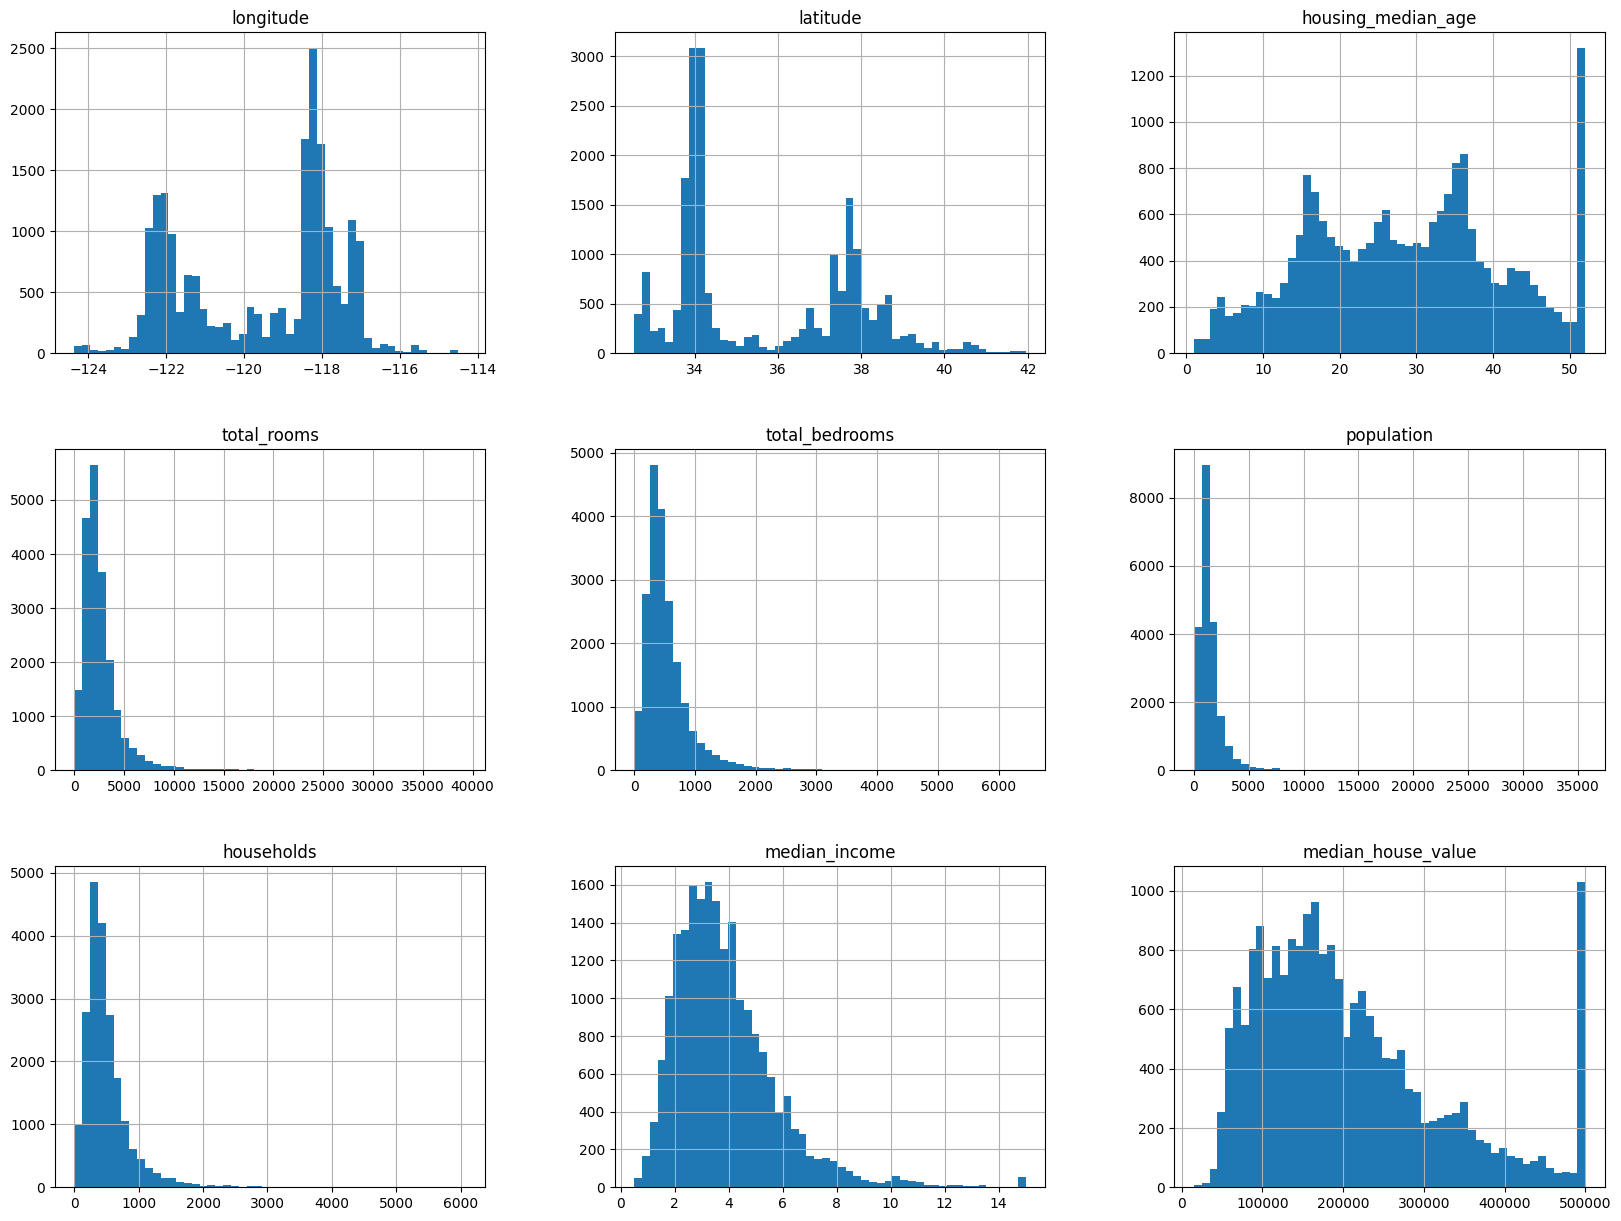

In [5]:
# plot heat map of the data with latitude and longitude as the x and y axis and the median house value as the color
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show() # shows the plot for all the data in the dataframe housing for all the columns



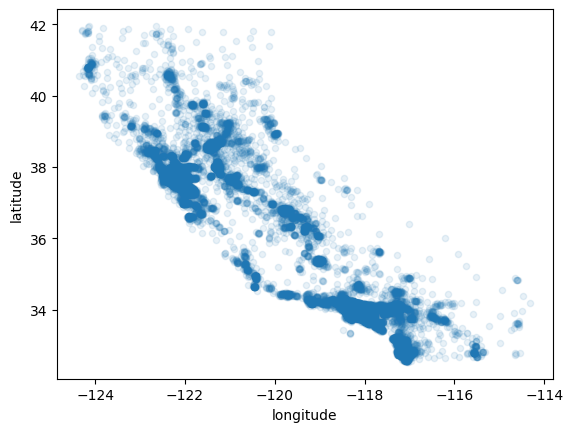

In [6]:
# plot scatter plot of the data with latitude and longitude as the x and y axis and the median house value as the color
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
plt.show() # shows the plot for all the data in the dataframe housing for all the columns



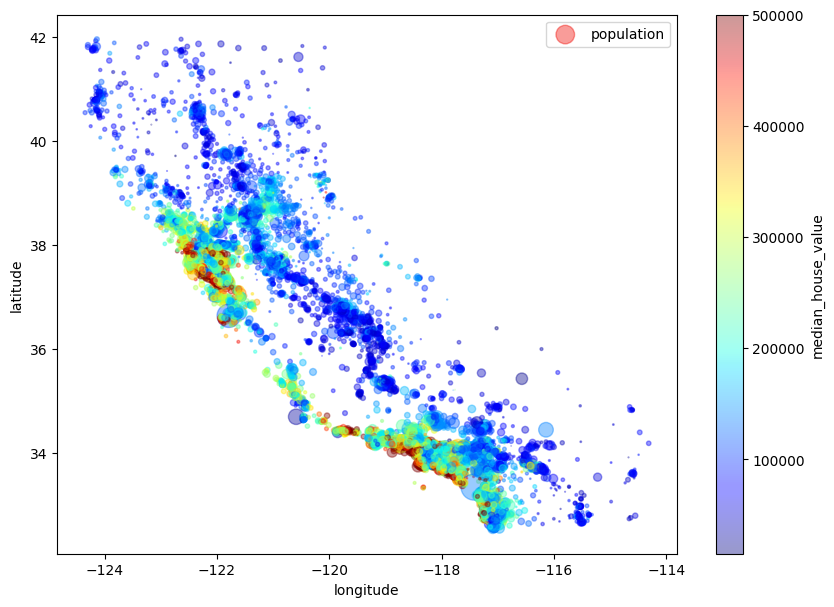

In [11]:
# plot scatter plot of the data with latitude and longitude as the x and y axis and the median house value as the color
#  and the size of the circle is the population and the color is the price
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()
plt.show() # shows the plot for all the data in the dataframe housing for all the columns

In [ ]:
# fit the model for the data
# 1. split the data into training and test data
# 2. create a pipeline to preprocess the data
# 3. fit the model to the training data
# 4. evaluate the model on the test data

# split the data into training and test data
import numpy as np
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), "train +", len(test_set), "test")

# 2. create a pipeline to preprocess the data


